<a href="https://colab.research.google.com/github/GauravSahani1417/Kaggle-Playground-Series-March-2021/blob/main/Kaggle_Playground_Series_March_2021_with_AE_Compressed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#AE training without Compression (Demo)
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/March 2021 Playground series/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/March 2021 Playground series/test.csv")

In [4]:
df_train.drop("id", axis=1, inplace=True)
df_test.drop("id", axis=1, inplace=True)

In [5]:
df_testing = pd.read_csv('/content/drive/MyDrive/March 2021 Playground series/test.csv')

In [6]:
df_train.drop("cont1", axis=1, inplace=True)
df_test.drop("cont1", axis=1, inplace=True)

df_train.drop("cont10", axis=1, inplace=True)
df_test.drop("cont10", axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
for c in df_train.columns: 
    if df_train[c].dtype=='object':
        LE = LabelEncoder()
        LE.fit(list(df_train[c].values) + list(df_train[c].values))
        df_train[c] = LE.transform(df_train[c].values)
        
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,target
0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1,0.629858,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0
1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1,0.370727,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0
2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1,0.502272,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0
3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1,0.934242,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0
4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1,0.254427,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,1


In [9]:
for c in df_test.columns: 
    if df_test[c].dtype=='object':
        LE = LabelEncoder()
        LE.fit(list(df_test[c].values) + list(df_test[c].values))
        df_test[c] = LE.transform(df_test[c].values)
        
df_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9
0,0,5,0,0,5,33,0,8,23,0,249,0,0,0,0,1,3,3,1,0.708120,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987
1,0,7,2,0,4,2,7,31,51,0,269,0,0,0,1,3,1,3,1,0.611637,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520
2,0,13,2,0,5,2,0,8,28,0,121,0,0,0,1,1,3,3,1,0.456289,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289
3,1,11,2,0,5,33,0,30,23,0,162,0,0,0,0,1,3,1,1,0.338692,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514
4,0,5,0,1,5,33,0,8,46,0,173,0,0,0,0,3,3,3,1,0.631671,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261


In [10]:
X = df_train.drop(['target'],1)
y = df_train['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=1)

In [13]:
MMS = MinMaxScaler()
MMS.fit(X_train)
X_train = MMS.transform(X_train)
X_test = MMS.transform(X_test)

In [14]:
X_train

array([[0.        , 0.35714286, 0.        , ..., 0.56767739, 0.33406248,
        0.32694385],
       [1.        , 0.42857143, 0.27777778, ..., 0.03169253, 0.37796049,
        0.34610996],
       [1.        , 0.35714286, 0.        , ..., 0.54609106, 0.29334634,
        0.12896742],
       ...,
       [0.        , 0.85714286, 0.        , ..., 0.24986355, 0.35305851,
        0.28615951],
       [0.        , 0.71428571, 0.        , ..., 0.14074886, 0.29900849,
        0.22616807],
       [1.        , 0.35714286, 0.        , ..., 0.36626158, 0.34130539,
        0.08849364]])

In [15]:
n_inputs = X.shape[1]
n_inputs

28

In [16]:
# define encoder
visible = Input(shape=(n_inputs,))

In [17]:
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [18]:
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [19]:
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

In [20]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [21]:
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [22]:
# output layer
output = Dense(n_inputs, activation='linear')(d)

In [23]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [24]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

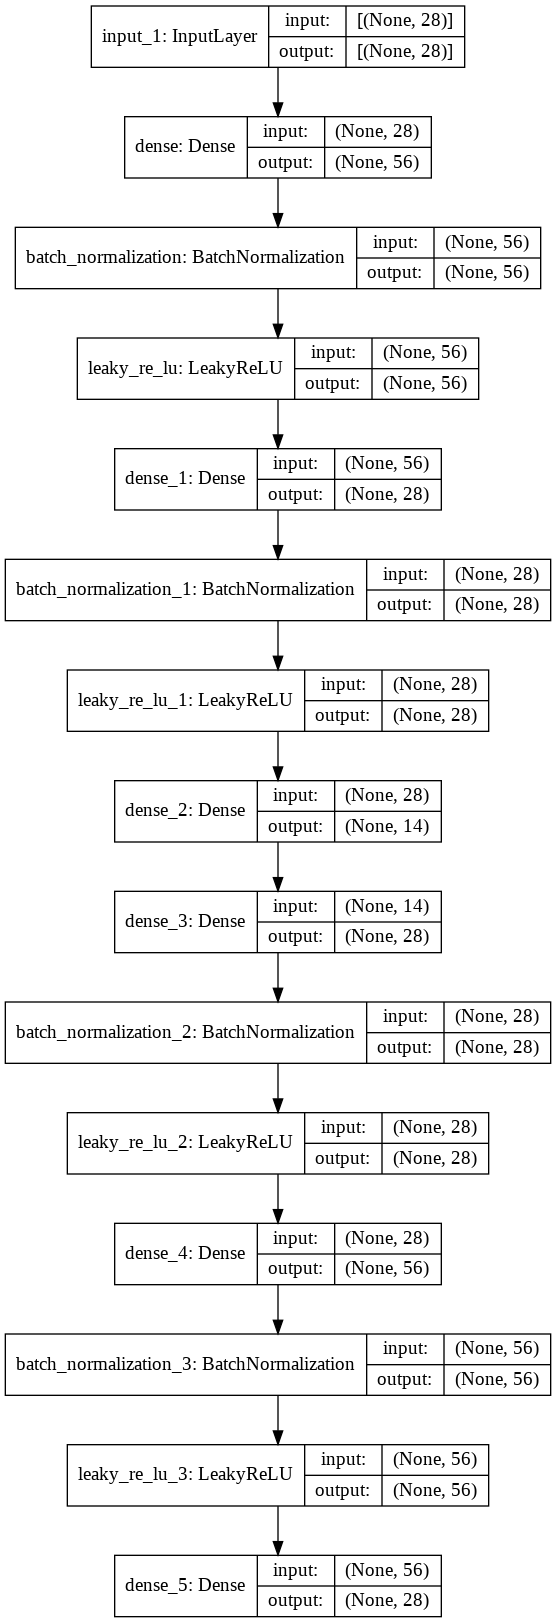

In [25]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [26]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
14625/14625 - 27s - loss: 0.0200 - val_loss: 0.0082
Epoch 2/200
14625/14625 - 25s - loss: 0.0115 - val_loss: 0.0052
Epoch 3/200
14625/14625 - 25s - loss: 0.0082 - val_loss: 0.0044
Epoch 4/200
14625/14625 - 26s - loss: 0.0071 - val_loss: 0.0040
Epoch 5/200
14625/14625 - 26s - loss: 0.0065 - val_loss: 0.0038
Epoch 6/200
14625/14625 - 26s - loss: 0.0062 - val_loss: 0.0042
Epoch 7/200
14625/14625 - 26s - loss: 0.0059 - val_loss: 0.0036
Epoch 8/200
14625/14625 - 26s - loss: 0.0058 - val_loss: 0.0035
Epoch 9/200
14625/14625 - 26s - loss: 0.0057 - val_loss: 0.0036
Epoch 10/200
14625/14625 - 25s - loss: 0.0056 - val_loss: 0.0032
Epoch 11/200
14625/14625 - 25s - loss: 0.0055 - val_loss: 0.0037
Epoch 12/200
14625/14625 - 25s - loss: 0.0055 - val_loss: 0.0031
Epoch 13/200
14625/14625 - 25s - loss: 0.0054 - val_loss: 0.0033
Epoch 14/200
14625/14625 - 25s - loss: 0.0053 - val_loss: 0.0033
Epoch 15/200
14625/14625 - 25s - loss: 0.0053 - val_loss: 0.0034
Epoch 16/200
14625/14625 - 25s - l

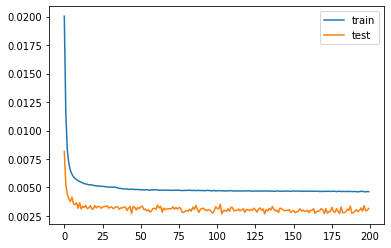

In [27]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
# define an encoder model (without the decoder)
encoder_Compressed = Model(inputs=visible, outputs=bottleneck)

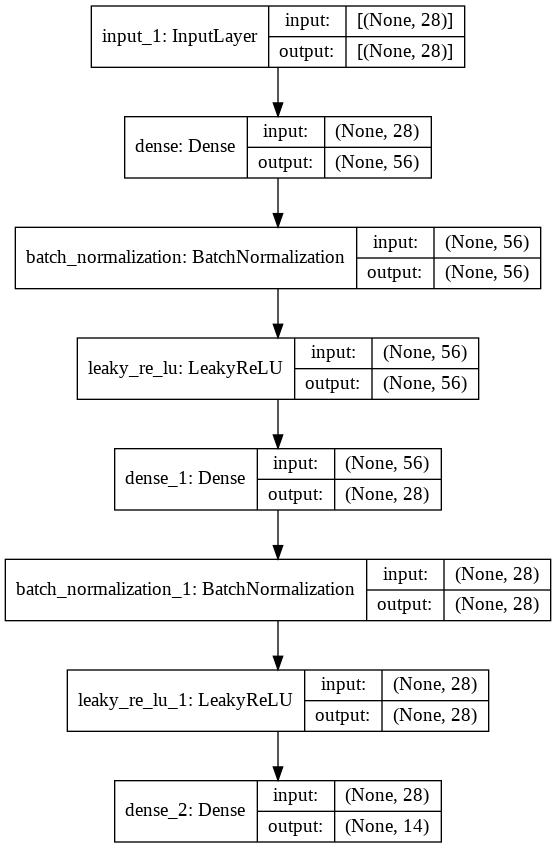

In [29]:
plot_model(encoder_Compressed, 'encoder_compress.png', show_shapes=True)

In [30]:
# save the encoder to file
encoder_Compressed.save('/content/drive/MyDrive/March 2021 Playground series/encoder_Compressed.h5')

In [31]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [32]:
model = lgb.LGBMClassifier(learning_rate=0.1,n_estimators=300)
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)

In [33]:
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)
roc = roc_auc_score(y_test, yhat)
print(roc)

0.8488333333333333
0.7758694407223516


In [34]:
# load the model from file
from keras.models import load_model
encoder_Compressed = load_model('/content/drive/MyDrive/March 2021 Playground series/encoder_Compressed.h5')

In [36]:
# encode the train data
X_train_encode = encoder_Compressed.predict(X_train)
# encode the test data
X_test_encode = encoder_Compressed.predict(X_test)

In [37]:
# define the model
model = lgb.LGBMClassifier(learning_rate=0.1,n_estimators=300)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat_1 = model.predict(X_test_encode)

In [38]:
# calculate accuracy
acc = accuracy_score(y_test, yhat_1)
print(acc)
roc = roc_auc_score(y_test, yhat_1)
print(roc)

0.8386515151515151
0.7602781654314261
